In [1]:
import pandas as pd
import tensorflow as tf
import os
import glob
import numpy as np
import random
import cv2
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import regularizers

# 신경망 구성

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation = "relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu",kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu",kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu",kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(3,activation="softmax")
])
model.summary()

Metal device set to: Apple M1 Max
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)     

2022-01-20 15:26:07.408958: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-20 15:26:07.409101: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
from keras import optimizers
model.compile(optimizer=tf.optimizers.RMSprop(learning_rate=1e-4),
              loss="categorical_crossentropy",
              metrics=['acc'])

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "RockPaperScissors/train",
    target_size =(150,150),
    batch_size = 30,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    "RockPaperScissors/validation",
    target_size =(150,150),
    batch_size = 30,
    class_mode = 'categorical'
)

Found 900 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


# 이미지 확인

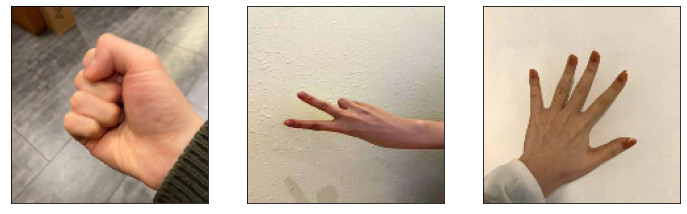

In [50]:
from keras.preprocessing import image

dir_root = "RockPaperScissors/train"
rock_file = glob.glob(dir_root+"/rock/*.jpg")
paper_file = glob.glob(dir_root+"/paper/*.jpg")
scissors_file = glob.glob(dir_root+"/scissors/*.jpg")

img_path=[]
img_path.append(random.choice(rock_file)) 
img_path.append(random.choice(paper_file))
img_path.append(random.choice(scissors_file))

x=[]

for i in range(3):
    tmp = image.load_img(img_path[i],target_size=(150,150))
    x.append(image.img_to_array(tmp))

x=np.array(x)

plt.figure(figsize = (12,4))

i=0

for batch in train_datagen.flow(x,batch_size=3):
    plt.subplot(1,3,i+1)
    plt.imshow(image.array_to_img(batch[0]))
    plt.yticks(ticks= []) #y축 tick 제거
    plt.xticks(ticks= []) #x축 tick 제거
    i+=1
    if i % 3 == 0:
        break

plt.show()

In [7]:
for data_batch, labels_batch in train_generator:
    print("배치 데이터 크기:",data_batch.shape)
    print("배치 레이블 크기:",labels_batch.shape)
    break

배치 데이터 크기: (30, 150, 150, 3)
배치 레이블 크기: (30, 3)


# 학습 및 그래프

In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch =30,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps=10,
    )

/Users/sihyun/miniforge3/envs/tf25/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-01-20 15:27:08.401958: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-20 15:27:08.402113: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/30


2022-01-20 15:27:08.665997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


29/30 [============================>.] - ETA: 0s - loss: 1.3345 - acc: 0.3793

2022-01-20 15:27:10.255325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 57ms/step - loss: 1.3343 - acc: 0.3789 - val_loss: 1.3062 - val_acc: 0.4000
Epoch 2/30
30/30 [==============================] - 1s 46ms/step - loss: 1.2783 - acc: 0.4411 - val_loss: 1.2170 - val_acc: 0.6567
Epoch 3/30
30/30 [==============================] - 1s 48ms/step - loss: 1.2035 - acc: 0.5344 - val_loss: 1.1073 - val_acc: 0.6767
Epoch 4/30
30/30 [==============================] - 1s 48ms/step - loss: 1.0835 - acc: 0.6011 - val_loss: 0.9849 - val_acc: 0.6900
Epoch 5/30
30/30 [==============================] - 1s 48ms/step - loss: 0.9756 - acc: 0.6689 - val_loss: 0.8880 - val_acc: 0.7333
Epoch 6/30
30/30 [==============================] - 1s 48ms/step - loss: 0.9002 - acc: 0.7100 - val_loss: 0.8389 - val_acc: 0.7500
Epoch 7/30
30/30 [==============================] - 1s 48ms/step - loss: 0.8031 - acc: 0.7533 - val_loss: 0.7943 - val_acc: 0.7400
Epoch 8/30
30/30 [==============================] - 2s 51ms/step - loss: 0.7602 - acc: 0.7800 

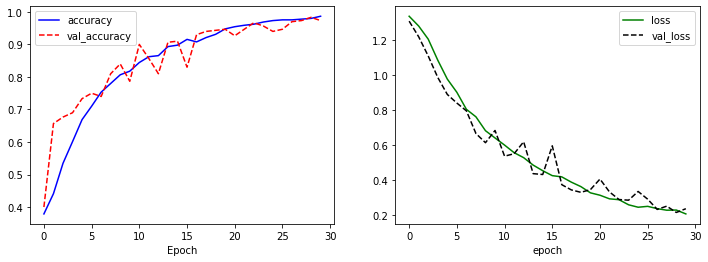

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(acc, 'b-',label ="accuracy")
plt.plot(val_acc, 'r--',label ="val_accuracy")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss, 'g-',label ="loss")
plt.plot(val_loss, 'k--',label ="val_loss")
plt.xlabel("epoch")
plt.legend()

plt.show()

# 테스트 데이터로 시험

In [10]:
test_genrator = test_datagen.flow_from_directory(
    "RockPaperScissors/test",
    target_size = (150,150),
    batch_size = 30,
    class_mode ='categorical'
)

Found 300 images belonging to 3 classes.


In [11]:
test_loss, test_acc = model.evaluate_generator(test_genrator,steps = 10)
print("test_acc : ",test_acc)

/Users/sihyun/miniforge3/envs/tf25/lib/python3.8/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test_acc :  0.9833333492279053


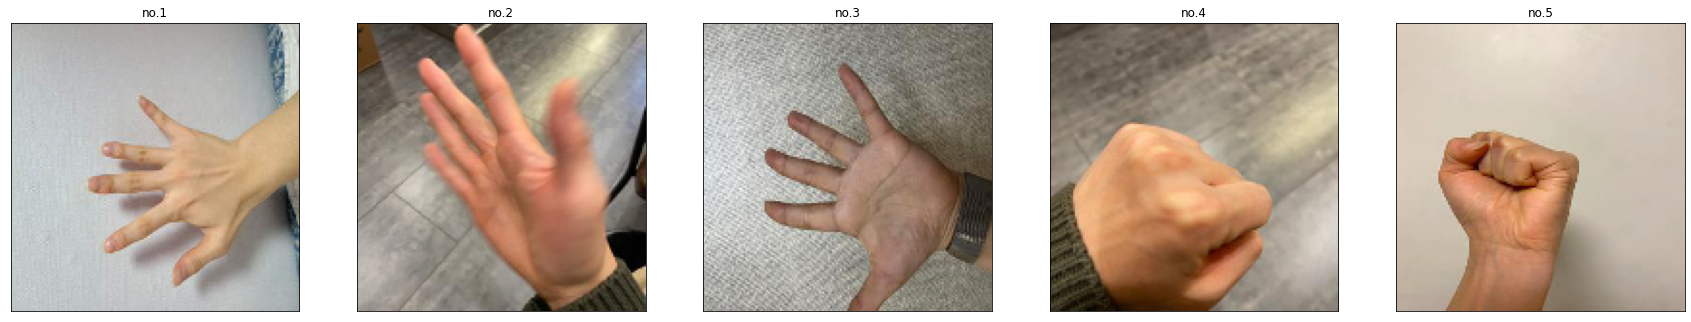

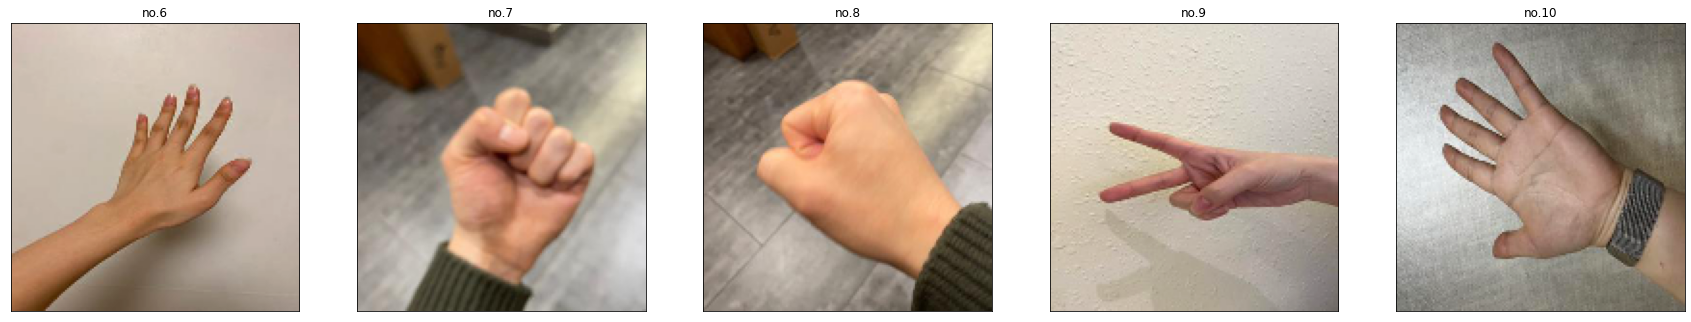

보:0	바위:1	가위:2

no.1:
예측: 0 	정답: 0 

no.2:
예측: 0 	정답: 0 

no.3:
예측: 0 	정답: 0 

no.4:
예측: 1 	정답: 1 

no.5:
예측: 1 	정답: 1 

no.6:
예측: 0 	정답: 0 

no.7:
예측: 1 	정답: 1 

no.8:
예측: 1 	정답: 1 

no.9:
예측: 2 	정답: 2 

no.10:
예측: 0 	정답: 0 

정답률: 100 %


In [53]:
tmp=test_genrator
b =next(tmp)
test_image=[]
test_label=[]
for i in range(10):
    test_image.append(b[0][i])
    test_label.append(b[1][i])

plt.figure(figsize = (30,30))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(image.array_to_img(test_image[i]))
    plt.title('no.{}'.format(i+1))
    
    plt.yticks(ticks= []) #y축 tick 제거
    plt.xticks(ticks= []) #x축 tick 제거
    
plt.show()

plt.figure(figsize = (30,30))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(image.array_to_img(test_image[i+5]))
    plt.title('no.{}'.format(i+6))
    
    plt.yticks(ticks= []) #y축 tick 제거
    plt.xticks(ticks= []) #x축 tick 제거
    
plt.show()

test_image= np.array(test_image)
y_prob = model.predict(test_image, verbose=0)
y = y_prob.argmax(axis=-1)

print("보:0\t바위:1\t가위:2\n")

answer_rate=0
for j in range(10):
    print('no.{}:'.format(j+1))
    print("예측:",y[j],"\t정답:",test_label[j].argmax(),"\n") 
    if(y[j] == test_label[j].argmax()):
        answer_rate += 10

print('정답률:', answer_rate, "%")